<table style="width: 100%;">
<tr style="background-color: transparent;">
<td width="100px"><img src="https://cs104williams.github.io/assets/cs104-logo.png" width="90px" style="text-align: center"/></td>
<td>
  <p style="margin-bottom: 0px; text-align: left; font-size: 18pt;"><strong>CSCI 104: Data Science and Computing for All</strong><br>
                Williams College<br>
                Fall 2023</p>
</td>
</tr>


# Lab 4: Functions, Tables, and Groups

<hr style="margin: 0px; border: 3px solid #500082;"/>

<h2>Instructions</h2>

- Before you begin, execute the cell at the TOP of the notebook to load the provided tests, as well as the following cell to setup the notebook by importing some helpful libraries. Each time you start your server, you will need to execute these cells again.  
- Be sure to consult your [Python Reference](https://cs104williams.github.io/assets/python-library-ref.html)!
- Complete this notebook by filling in the cells provided. For problems asking you to write explanations, you **must** provide your answer in the designated space. 
- Please be sure to not re-assign variables throughout the notebook.  For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously.
- This lab has hidden tests on it. That means even though tests may say 100% passed, doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the lab.
- To use one or more late days on this lab, please fill out our [late day form](https://forms.gle/4sD16h3hN1xRqQM27) **before** the due date.

<hr/>
<h2>Setup</h2>


In [1]:
# Run this cell to set up the notebook.
# These lines import the numpy, datascience, and cs104 libraries.

import numpy as np
from datascience import *
from cs104 import *
%matplotlib inline
%pdb

Automatic pdb calling has been turned ON


<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 1. San Diego Burritos (35 pts)



<font color='#B1008E'>
    
##### Learning objectives
- Manipulate multiple tables via built-in table functions.
- Analzye histogram and scatter plots.

We are trying find the best burritos in San Diego.  We have two comprehensive datasets on many burrito establishments in the San Diego area taken from (and cleaned from) [here](https://www.kaggle.com/srcole/burritos-in-san-diego/data).

The following cell reads in a table called `ratings` which contains names of burrito restaurants, their Yelp rating, Google rating, as well as their Overall rating. The `Overall` rating is not an average of the `Yelp` and `Google` ratings, but rather it is the overall rating of the customers that were surveyed in the study above.

It also reads in a table called `burritos_types` which contains names of burrito restaurants, their menu items, and the cost of the respective menu item at the restaurant.

In [2]:
#Just run this cell
ratings = Table.read_table("ratings.csv")
ratings.show(5)

burritos_types = Table.read_table("burritos_types.csv")
burritos_types.show(5)

Name,Yelp,Google,Overall
Albertacos,3.5,3.9,3.45
Burrito Factory,4.5,4.8,3.5
Burros and Fries,3.5,4.1,3.575
Caliente Mexican Food,3.5,4.4,3.25
California Burrito Company,3.5,4.4,3.2


Name,Menu_Item,Cost
Albertacos,California,5.7
Albertacos,Carne asada,5.25
"Alberto's 623 N Escondido Blvd, Escondido, CA 92025",Carne Asada,4.59
Burrito Box,Steak with guacamole,11.5
Burrito Factory,Steak everything,7.35


#### Part 1.1 (5 pts)


 It would be easier if we could combine the information in both tables. Assign `burritos` to the result of **join**ing the two tables together, so that we have a table with the ratings for every corresponding menu item from every restaurant. Each menu item has the same rating as the restaurant from which it is from. 

*Note:* It doesn't matter which table you put in as the argument to the [join](https://www.cs.williams.edu/~cs104/auto/python-library-ref.html#join) method, either order will work for the autograder tests.

In [3]:
burritos = ratings.join("Name", burritos_types)
burritos.show(5)

Name,Yelp,Google,Overall,Menu_Item,Cost
Albertacos,3.5,3.9,3.45,California,5.7
Albertacos,3.5,3.9,3.45,Carne asada,5.25
Burrito Factory,4.5,4.8,3.5,Steak everything,7.35
Burros and Fries,3.5,4.1,3.575,California,7.19
Burros and Fries,3.5,4.1,3.575,Carne asada,6.89


In [4]:
#grader.check("p1.1")

<!-- BEGIN QUESTION -->

#### Part 1.2 (5 pts)


 Let's look at how the Yelp scores compare to the Google scores in the `burritos` table. 
 
First, assign `yelp_and_google` to a table only containing the columns `Yelp` and `Google`. 

Then, make a scatter plot with Yelp scores on the x-axis and the Google scores on the y-axis. Store your plot in the `plot` variable so that we can then add the line $y=x$ to help you draw conclusions.



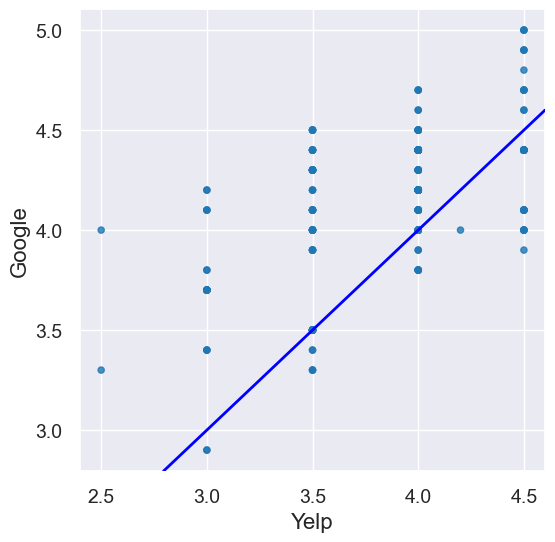

In [5]:
yelp_and_google = burritos.drop("Menu_Item", "Cost")
plot = yelp_and_google.scatter("Yelp", "Google")

# Don't change/edit/remove the following line.
plot.line(slope=1, intercept=0)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 1.3 (5 pts)


 Looking at the scatter plot you just made in Part 1.2, do you notice any pattern(s) (i.e. is one of the two types of scores consistently higher than the other one)? If so, describe the patterns you observe **briefly** in the cell below. 

<hr style="margin:0; border: 1px solid #FFBE0A;"/><font color='#FFBE0A'>Written Answer:</font>

The Google scores seem to be typically higher than Yelp scores. Many of the points on the scatter plot lay above the y=x line, showing that the value on the y-axis (Google ratings) are usually higher than the corresponding value on the x-axis (Yelp ratings). 

<hr style="margin:0; border: 1px solid #FFBE0A;"/>

<!-- END QUESTION -->

#### Part 1.4 (5 pts)


In the `burritos` table, there are many types of burritos that have the word "California" in them! We'd like to know which of these "California" burritos has the highest mean rating across all restaurants. 

Create a table that has two columns (in the exact following order): 
1. The name of the California burrito.
2. The average overall rating of that burrito across all restaurants that serve it. 

**In your calculations, you should compare burritos that contain the word "California".** For example, there's "California" burritos, "California breakfast" burritos, "California Surf and Turf" burritos, etc. The predicate [are.containing](https://www.cs.williams.edu/~cs104/auto/python-library-ref.html#containing) will be useful here. 

*Hint:* If multiple restaurants serve the "California - Chicken" burrito, what table method can we use to aggregate those together and find the average overall rating?

**Notes:** 
-  For the sake of these questions, we are treating each menu item's rating the same as its respective restaurant's, as we do not have the rating of every single item at these restaurants. You do not need to worry about this fact, but we thought to mention it.
- Break up the solution into multiple lines, with the final output table stored in `california_burritos`.  That will be far less error prone and easier to debug than writing it as a single line.

In [6]:
california_burritos = burritos.where("Menu_Item",are.containing("California")).drop('Name', 'Yelp', 'Google', 'Cost').group('Menu_Item', np.average)
california_burritos

Menu_Item,Overall average
California,3.5242
California (only cheese),4.1
California + Guac + sour cream,3.4
California - Chicken,3.45839
California - Pork Adobada,3.26429
California - Steak,3.26429
California Chipotle,4.36667
California Everything,4.1
California Everything mini,4.1
California Surf,3.66667


In [7]:
#grader.check("p1.4")

#### Part 1.5 (5 pts)


 Given this new table `california_burritos`, we can figure out the name of the California burrito with the highest overall average rating. Create a string `best_california_burrito` that is assigned to a line of code that outputs the string that represents the name of the California burrito with the highest overall average rating. If multiple burritos satisfy this criteria, you can output any one of them. 

In [8]:
best_california_burrito = max(california_burritos.column("Menu_Item"))
best_california_burrito 

'Surfin California'

In [ ]:
assert(best_california_burrito in ['California Chipotle', 'Pork California'])

AssertionError: 

> /var/folders/s2/cqbykz4x4cv5k80y8x5lkqs40000gp/T/ipykernel_78561/4150137776.py(1)<module>()
----> 1 assert(best_california_burrito in ['California Chipotle', 'Pork California'])



In [ ]:
#grader.check("p1.5")

<!-- BEGIN QUESTION -->

#### Part 1.6 (5 pts)


We hypothesize that burritos in San Diego are cheaper (and taste better) than the burritos in Williamstown. 

Plot a histogram that visualizes that distribution of the costs of the burritos from San Diego in the `burritos` table. Also use the provided `bins` variable when making your histogram, so that the histogram is more visually informative. 

In [ ]:
bins = np.arange(2, 15, 1)

# Please also use the provided bins
burritos.hist("Cost", bins=bins)

<!-- END QUESTION -->

#### Part 1.7 (5 pts)


 What percentage of burritos in San Diego are less than $6? Assign `burritos_less_than_6` to your answer, which should be between 0 and 100. You should only use the histogram above to answer the question. Do not use code on the table to to find the answer, just eyeball the heights and use Python to evaluate your arithmetic. 

Your answer does not have to be exact, but it should be within a couple percentages of our answer.

In [ ]:
burritos_less_than_6 = 22
burritos_less_than_6

In [ ]:
#grader.check("p1.7")

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 2. Penguins (30 pts)



<font color='#B1008E'>
    
##### Learning objectives
- Practice using the Table methods `pivot` and `group`

We'll use a data from the [palmerpenguins dataset](https://github.com/allisonhorst/palmerpenguins), which captures data for three species of penguins (Adelie, Chinstrap, and Gentoo) on three islands in the Palmer Archipelago, Antarctica (Biscoe, Dream, and Torgersen).  

Here's some artwork from the dataset creator showing the three species and what several of the data elements mean:

<img width=45% src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png"> <img width=45% src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png">

We have lightly cleaned the data to make it easier to work with. Run the following cell to load our data into a table called `penguins`.

In [ ]:
penguins = Table.read_table("penguins.csv")
penguins.show(10)

#### Part 2.1 (5 pts)


Since we'll be focussing most on bill length for our various penguins, create a new table with three columns labeled "species", "island", and "bill length" in that exact order.

In [ ]:
bill_lengths = penguins.drop('bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex').relabeled("bill_length_mm", "bill length")
bill_lengths

In [ ]:
#grader.check("p2.1")

#### Part 2.2 (5 pts)


Now create a new table `bill_length_mean_by_species` with two columns. The first column should be `species` and the second column should be `bill length mean`.  
Each row in that second column should be the *mean* bill length for the given species.

In [ ]:
bill_length_mean_by_species = penguins.group("species", np.mean).drop("island mean", 'bill_depth_mm mean', 'flipper_length_mm mean', 'body_mass_g mean', 'sex mean').relabeled("bill_length_mm mean", "bill length mean")
bill_length_mean_by_species

In [ ]:
#grader.check("p2.2")

#### Part 2.3 (5 pts)


Now create a new table `bill_length_max_by_species_and_island` with three columns. The first column should be `species`, the second should be `island` and the third should be `bill length max`.  

*Hint:* You'll use `group` again, but this time the first parameter should be an array of both columns you wish to group by: `species` and `island`.

In [ ]:
bill_length_max_by_species_and_island = penguins.group((make_array("species", "island")), max).select('species', 'island', 'bill_length_mm max').relabeled ('bill_length_mm max', 'bill length max')
bill_length_max_by_species_and_island

In [ ]:
#grader.check("p2.3")

#### Part 2.4 (5 pts)


In the previous two parts, we used aggegation functions already provided by Python and numpy.  In this part, we'll define a new aggegation function to use with `group()`.  

In particular, we would like to know the bill length **spread** for each penguin on each island.  The spread is the **difference between the longest bill length and shortest bill length for penguins of that species on that island**.  Recall, the group aggegation function takes an array of values for all rows in the group and returns the value to associate with the group as a whole.

Create a new table `bill_length_spreads` containing three columns: `species`, `island`, `bill length spread`.  Do this by completing the following two steps: 

1. First you'll need to define a new function `spread` which takes in an array of numbers and returns the spread of those numbers.

2. Group your bill length data as in the last part, but with your new function.


In [ ]:
def spread(values): 
    """Return spread of the values array of numeric data."""
    return (max(values)-min(values))

bill_length_spreads = penguins.group(make_array("species", "island"), spread).select("species", "island", "bill_length_mm spread").relabeled("bill_length_mm spread", "bill length spread")
bill_length_spreads

In [ ]:
#grader.check("p2.4")

#### Part 2.5 (5 pts)


Rather than creating the table in the previous part, we'll create a new table that is a bit easier to read.  

In particular, set `spreads_matrix` to a table containing islands as the rows and species as the columns.  Each value in the table is the spread for that particular species (column) and island (row).

*Hint:* What table function allows you to specify the rows and columns of a new table?

In [ ]:
spreads_matrix = bill_length_spreads.pivot("species", "island")
spreads_matrix

In [ ]:
#grader.check("p2.5")

In [ ]:
assert(spreads_matrix.where("island", "Biscoe").row(0).item("Gentoo") == approx(18.7))

<!-- BEGIN QUESTION -->

#### Part 2.6 (5 pts)


Give an explanation as to why some of the row values are `0` in the `spreads_matrix` table from the previous question.

<hr style="margin:0; border: 1px solid #FFBE0A;"/><font color='#FFBE0A'>Written Answer:</font>

Within the data, there are no recorded Chinstraps in Biscoe or Torgersen, and there are no Gentoos in Dream or Torgersen. The 0s represent that there were 0 recorded birds of that species on the correlating islands. 

<hr style="margin:0; border: 1px solid #FFBE0A;"/>

<!-- END QUESTION -->

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 3. Boston City Employee Salaries (20 pts)



<font color='#B1008E'>
    
##### Learning objectives
- Practice using the Table methods `where`, `select` and `group`

We now examine publicly available [City of Boston payroll data for employees](https://data.boston.gov/dataset/418983dc-7cae-42bb-88e4-d56f5adcf869/resource/ec5aaf93-1509-4641-9310-28e62e028457/download/employee-earnings-report-2021.csv) for 2021.  We have filtered it to retain just some of the columns.  The next cell loads it into the table `full_boston`.

In [ ]:
full_boston = Table.read_table("boston-earnings.csv")
full_boston

The table has one row for each of the 22,546 city employees in 2021. 

The first two columns describe the department and title for each employee.  For example, the employee in the fourth row is a Police Officer in the Boston Police Department.  


The next seven columns contain the dollar amounts paid to the employee in the calendar year 2021 for various reasons: 

* `REGULAR`: the employees base salary.
* `RETRO`: retroactive pay from earlier work.
* `OTHER`: anything not covered by the other categories.
* `OVERTIME`: work beyond regular hours.
* `INJURED`: pay for time not worked due to injury.
* `DETAIL`: pay for work done as part of special details.
* `QUINN_EDUCATION_INCENTIVE`: an incentive program to encourage police officers to earn degrees in law enforcement and criminal justice.

The `TOTAL_GROSS` column is the sum of those seven.  In many cases, especially for police officers and fire fighters, the totall gross compensation is much larger that the regular salary because of over-time and special assignment details.

For this lab, we will be using `DEPARTMENT_NAME`, `TITLE`, `REGULAR`, and `TOTAL_GROSS`.  Run the next cell to load those columns into the table `boston`

In [ ]:
boston = full_boston.select("TITLE", "DEPARTMENT_NAME", "REGULAR", "TOTAL_GROSS")
boston

#### Part 3.1 (5 pts)


Create a new table of city employees having gross earnings over $100,000. That table should have two columns, `TITLE` and `TOTAL_GROSS`, and be sorted in decreasing order by the latter.  

Split your work into multiple lines to make it easier to test and debug!

In [ ]:
first = boston.where("TOTAL_GROSS", are.above(100000)).select("TITLE", "TOTAL_GROSS")
over_100k = first.sort("TOTAL_GROSS", descending = True)
over_100k

You may be surprised by the two outliers at the top of the list.  A quick [web search](https://www.bostonherald.com/2022/02/26/boston-a-six-figure-jackpot-for-city-employees-2-topped-1m/) sheds some light on those two employees (and may also help you validate your other answers below!).

In [ ]:
#grader.check("p3.1")

#### Part 3.2 (5 pts)


We'd now like to know the number of employees with each `TITLE` having gross earnings greater than \$100,000.  Use `over_100k` to construct a new table with following two columns (in order):  `TITLE` and `100k Earners`. 

The `100k Earners` column should report the number of employees given that title who earned over \$100k.  

Split your work into multiple lines to make it easier to test and debug!

In [ ]:
over_100k_by_title = over_100k.group("TITLE", sum).relabeled("TOTAL_GROSS sum", "100k Earners")
over_100k_by_title

In [ ]:
#grader.check("p3.2")

In [ ]:
answer = over_100k_by_title.sort("100k Earners", descending=True).column("100k Earners").item(20)
assert(answer == 46)

#### Part 3.3 (5 pts)


Now create a table that summarizes the total earnings for each department.  

Your table should have columns labeled `DEPARTMENT_NAME` and `DEPARTMENT_GROSS`, where the latter is the total gross earnings of all empoloyees in that department.  

Sort from highest to lowest department gross earnings. 

*Note:* This is **not** for the subset of the data that the earnings are over 100k, but rather the entire dataset. 


*Tips:* Split your work into multiple lines to make it easier to test and debug.

In [ ]:
first_step = full_boston.group("DEPARTMENT_NAME", sum).relabeled ("TOTAL_GROSS sum", "DEPARTMENT_GROSS").select("DEPARTMENT_NAME", "DEPARTMENT_GROSS")
first_step

In [ ]:
dept_gross_earnings = first_step.sort("DEPARTMENT_GROSS", descending = True)
dept_gross_earnings

In [ ]:
#grader.check("p3.3")

<!-- BEGIN QUESTION -->

#### Part 3.4 (5 pts)


Create a bar chart showing the department gross earnings for the top 15 departments when ranked by total gross earnings.

In [ ]:
dept_gross_earnings_bar = dept_gross_earnings.take(np.arange(0,14))
dept_gross_earnings_bar.barh("DEPARTMENT_NAME")

<!-- END QUESTION -->

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 4. Interactive Visualizations and Choropleths (15 pts)



<font color='#B1008E'>
    
##### Learning objectives
- Use `interact` to create interactive visualizations.
- Create choropleths to present geographic information.
</font>

Let's look at the capabilities of the `interact` function we introduced above.  

The function `interact` takes as an input argument the function `f`, and additional arguments describing the choice of values for each parameter to `f`, as well as how the user will choose a value.  

Below, our function of interest is `sum_three`, which takes three parameters -- `a`, `b`, and `c` -- and prints their sum.  We call interact with `sum_three` and the three keyword arguments describing that:
* `a` can take on the values 1, 2, ..., 20, and the choice is presented as a *slider*.
* `b` can take on either 5 or 10, and the choice is presented as a *popup choice menu*.
* `c` can only be 100, and there is *no choice* for the user to make.



In [ ]:
# Run this cell and play around with the resulting interaction
def sum_three(a,b,c):
    print()
    print("     Sum = ", a + b + c)
    print()

interact(sum_three, 
         a=Slider(1,20),
         b=Choice(5,10),
         c=Fixed(100))

The following cell loads the `vdem` table, which contains several key indicies for measuring democracy in the [The V-Dem Dataset](https://v-dem.net/data/the-v-dem-dataset/), which the authors describe as a data set containing "the world's most comprehensive and detailed democracy ratings".   

In [ ]:
vdem = Table().read_table('vdem-clean.csv')
vdem.where('year', 2022).show(10)

A few notes about the column variables we'll focus on:
* **geo**: Each country's three-letter code established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard.
* **polyarchy:** A numerical value between 0 and 1 that measures "*to what extent is the ideal of electoral democracy in its fullest sense achieved?*"  
    
* **liberal:**  A numerical value between 0 and 1 that measures "*to what extent is the liberal principle of democracy achieved?*"

Run the following cell to see a longitudinal plot of our democracy metrics for the United States.  The code defines a function `country_indices` that extracts the relevant rows for the given country name and plots them as a long plot.

In [ ]:
def country_indices(country_name):
    plot = vdem.where('country', country_name).select('year', 'polyarchy', 'liberal').plot('year')
    plot.set_ylim(0,1)
    plot.set_title("Indices for " + country_name)
    
country_indices('United States of America')

These plots reflect a number of key aspects in our country's history that you may be able to identify.  For example: 
- Why may the measure of polyarchy have jumped up right arount 1920?  
- How about the upward trend for the measure of liberal principle from about 1965-1975?  
- Since 2000, why are there notable shifts in polyarchy about every four years?

<!-- BEGIN QUESTION -->

#### Part 4.1 (5 pts)


**Interactive visualization.** Let's create interactive visualization that generates a similar graph for every country in our dataset by selecting the country's name from a *popup choice menu*.  We create a list of all country names for you to use.

*Hint*: If you're stuck, look back at how we used the `sum_three` function with `interact`. 

In [ ]:
all_countries = np.unique(vdem.column('country'))   # all countries in vdem dataset

interact(country_indices,
         country_name = Choice(all_countries))

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 4.2 (5 pts)


We now return to the final column in our table, **regime**.  This is a categorical variable answering the question "*How can the political regime overall be classified considering the competitiveness of access to power (polyarchy) as well as liberal principles?*"  There are four values we summarize here:

* **0: Closed autocracy.** No multiparty elections.
* **1: Electoral autocracy.** De-jure multiparty elections but elections may not be free or fair.
* **2: Electoral democracy.** De-facto free and fair multiparty elections, but does not necessarily satisfy principles such as access to justice transparent law enforcement, or rule of law.
* **3: Liberal democracy.** De-facto free and fair multiparty elections and does satisfy principles such as access to justice transparent law enforcement, or rule of law.
    
The regime classification is made using a formula based on the other variables to categorize each country, including the two explored above.  

[Choropleth maps](https://en.wikipedia.org/wiki/Choropleth_map) are a particular type of visualization that are excellent for presenting information like this.  We can create a country-level choropleth by first constructing a table with two columns: 1) geocodes and 2) the values for the countries with those codes.  The `Countries.map_table` function then creates the visualization by converting the values to a color scale and then coloring each country on a world map according to that scale.  Here is an example for regime.

In [ ]:
geo_regime = vdem.where('year', 2022).select('geo', 'regime')
Countries.map_table(geo_regime, palette="RdBu")   
# palette describes the color scale.  Try: "Spectral", "BuGn", "RdYlGn" too!

Now we'll make an interactive visualization for any year between 1990 and 2022.  First complete the following function `visualize_regime` that creates a choropleth like the one above for a given year.

In [ ]:
def visualize_regime(year):
    geo_regime = vdem.where('year', (year)).select('geo', 'regime')
    Countries.map_table(geo_regime, palette="RdBu")
    
visualize_regime(2022) # Should look like the one above.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 4.3 (5 pts)


Now, call `interact` on your `visualize_regime` function and let the user pick a `year` between 1900 and 2022 using a slider.

In [ ]:
interact(visualize_regime, 
         year=Slider(1900, 2022))

To explore more, add additional cells below (using the "+" button in the toolbar) and try some of the following visualizations:
* Create a choropleth of the **change** in polyarchy score from 2000 to 2022.  Then create an interactive visualization that shows you the change from any date beteeen 1900 and 2021 and 2022.
* Explore whether `polyarchy` and `liberal` are related by plotting those indices for 2022 in a scatter plot.  Create an interactive visualization that lets you plot that information for any year.
* Generalize `regime` to a new function that takes both the year, and the variable to plot (`regime`, `polyarchy` or `liberal`).  Create an interactive choropleth using your function that lets the user set both the year and the variable to present.

<!-- END QUESTION -->

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 5. Explore the Data (10 pts)



<font color='#B1008E'>
    
##### Learning objectives
- Apply your experience manipulating tables and creating visualizations to creative, open-ended problems

In this question, we'd like you to further explore one of the data sets from this lab. 

You goal is to make **one concrete quantitative statement** about what the data shows, beyond what we explored in the questions above.

This question is intentionally open ended, and you may take it in any direction you like.  There are two parts:

1. In the first part, you'll write some code to explore and visualize the data.
2. In the second part, you'll tell us what you discovered and how the first part supports your conclusions.

If you are having trouble getting started, here are two ideas:
* Tell us something about our penguin species: does flipper length correlate to body mass?  Are males always larger on average than females for each species, and is the ratio between male/female weights roughly the same for each species?  There is one species on all three islands -- are those three groups meaningfully different in terms of bill length, mass, etc?
* Define a "bang for buck" metric for our burrito data that is an item's rating divided by cost.  From that, tell us which items are the greatest deal (most "bang for buck") and the worst deal (least "bang for buck").  Also, does it appear that price and rating are strongly correlated?
* Which countries have seen the greatest positive/negative change in the `polyarchy` and `liberal` metrics since 2002?

<!-- BEGIN QUESTION -->

#### Part 5.1 (5 pts)


In the cell below, write the code to investigate the property you are interested in looking at.

*Note:* We give you one code cell for your Python code below.  You may add as many additional cells as you like.  Just click the `+` sign in this tab's toolbar to insert a new cell.  Then select "Markdown" from the toolbar's popup menu if you want the new cell to be for text, or "Code" if you want it to be for Python code.  Markdown cells can include basic formatting.  Click on any of our formatted text cells to see how to create lists, bold text, etc., or have a look [here](https://www.markdownguide.org/basic-syntax).

In [ ]:
penguins = Table.read_table("penguins.csv")
penguins.show(10)

In [ ]:
flipper_length_and_body_mass = penguins.select("flipper_length_mm", "body_mass_g")
flipper_length_and_body_mass

In [ ]:
length_and_body_mass = flipper_length_and_body_mass.scatter("flipper_length_mm", "body_mass_g").set_title("Penguin Flipper Length and Body Mass").set_ylabel("Body Mass (g)").set_xlabel("Flipper Length (mm)")
length_and_body_mass

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 5.2 (5 pts)


In this cell below, state a **quantitative property** you discovered for the dataset you examined in the first part.  Write a couple sentences stating your conclusion and how your work in the first part supports that conclusion.

<hr style="margin:0; border: 1px solid #FFBE0A;"/><font color='#FFBE0A'>Written Answer:</font>

Does flipper length correlate to body mass?
The scatterplot I created provides strong evidence for there being a correlation between body mass and flipper length among three species of penguins within three islands. The scatterplot demonstrates a strong, positive correlation between flipper length and body mass; when flipper length increases, body mass increases and vice versa.

<hr style="margin:0; border: 1px solid #FFBE0A;"/>

<!-- END QUESTION -->

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 6. Extra Credit: Better Prediction of Children's Heights


This question is entirely **optional**.  We'll award up to 5 points of extra credit towards your lab score this week if you wish to work on it.

We begin by revisiting the child height predictions for the "galton" data set from lecture.  Recall that we predict a child's height based on the average height of their parents.  Specifically, we predict a child's height to be the average of the heights of all children whose parents had the same average height (+/- 0.5 inches) as that child.  Below, we include our code from lecture to compute the prediction and plot the results.

In [ ]:
# The original measurements
galton = Table.read_table('galton.csv')
heights = galton.select('father', 'mother', 'childHeight', 'gender').relabeled(2, 'child')

def average(x, y):
    """Compute the average of two values"""
    return (x+y)/2

# Compute the parent average heights and add to table.
parent_avg = heights.apply(average, 'mother', 'father')
heights = heights.with_columns('parent average', parent_avg)

In [ ]:
# Add a prediction column that has a prediction of that child's
# height based on the parents' average height.

def predict_child(parent_avg_height):
    """Given the parent's average height, compute a prediction for their 
       children's height by averaging the heights of all children whose 
       parents had the same average +/- 0.5 inches."""
    close_points = heights.where('parent average', are.between(parent_avg_height - 0.5, parent_avg_height + 0.5))
    return close_points.column('child').mean()          

predicted = heights.apply(predict_child, 'parent average')
height_pred = heights.with_columns('prediction', predicted)
height_pred.show(10)

In [ ]:
# A plot of the predicted height for each child.
height_pred.select('child', 'parent average', 'prediction').scatter('parent average')

<!-- BEGIN QUESTION -->

#### Part 6.1 (0 pts)


We want to quantify our prediction accuracy, and then develop a model with better accuracy.  

To do this, we'll first define the error of a prediction to be the difference between the predicted and actual height of a child.  If the prediction is too high, we are left with a positive error term; if it is too low, we are left with a negative error term.  

Add a column called `error` to the `height_pred` table capturing the error for each row.  To check your work, the first three error terms for the data set are -3.1, 0.9, and 1.1.

In [ ]:
def error_func(x, y):
    """Difference between predicted & actual height of a child"""
    return (x - y)

error = height_pred.apply(error_func, 'prediction', 'child')
height_pred = height_pred.with_columns('error', error)
height_pred.show(10)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 6.2 (0 pts)


Now plot a histogram of the "error" column.  

*Hint:* You should see a fairly symmetric curve centered around 0 with tails that extend to about -8 and +9.

In [ ]:
height_pred.hist("error")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 6.3 (0 pts)


We'll now explore whether the errors correlate with gender.  Create an overlaid histogram for the "error" column grouping by gender.

In [ ]:
height_pred.hist("error", group="gender", bins=10)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 6.4 (0 pts)


Does your histogram show systematic bias in the predictions, where all of the guesses for a particular gender are skewed?  Explain what the histogram illustrates with respect to prediction bias.

<hr style="margin:0; border: 1px solid #FFBE0A;"/><font color='#FFBE0A'>Written Answer:</font>

Generally, the male predictions were underestimated, as the majority of them had a negative error rate, meaning their actual heights were often greater than their predictions. On the contrary, many female predictions were overestimated, as a majority of them had a positive error rate, meaning their predictions were often greater than their actual heights. 

<hr style="margin:0; border: 1px solid #FFBE0A;"/>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 6.5 (0 pts)


We'd now like you to build a more accurate prediction model.  The key idea is that when you predict a child's height, you should only look at the heights of other children with the *same gender* when computing an average height for those with parents with similar average height.  

The end result of the code you write for this part should be a new table, `height_with_both_pred` that contains everything in `height_pred` plus two new columns:

* `prediction with gender`: the new predictions that consider each child's gender.
* `error with gender`: the error values for your new predictions.

Test your code as you write it, and create scatter plots and histograms you believe will be useful for understanding whether your code is working.

You will explain the conclusions you are able draw from this exercise in the next part.

*Note:* We give you one code cell below.  You may add as many additional cells as you like.  Just click the `+` sign in this tab's toolbar to insert a new cell.  Then select "Markdown" from the toolbar's popup menu if you want the new cell to be for text, or "Code" if you want it to be for Python code.  Markdown cells can include basic formatting.  Click on any of our formatted text cells to see how to create lists, bold text, etc., or have a look [here](https://www.markdownguide.org/basic-syntax).


In [ ]:
height_with_both_pred = 

The following lines should provide insight into what your new prediction model predicts for each child, and also what the error  distribution looks like, when compared to the original.

In [ ]:
# Assuming you used the names for columns described above, these lines plot two key graphs you 
# will want to examine.

# Uncomment these lines:
# height_with_both_pred.select('child', 'parent average', 'prediction with gender').scatter('parent average')
# height_with_both_pred.hist('error', 'error with gender')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 6.6 (0 pts)


Explain the graphs in the previous part.  What does the scatter plot show, and why?  Does the histogram demonstrate improved prediction?  Why do you conclude that?

<hr style="margin:0; border: 1px solid #FFBE0A;"/><font color='#FFBE0A'>Written Answer:</font>

_Type your answer here, replacing this text._


<hr style="margin:0; border: 1px solid #FFBE0A;"/>

<!-- END QUESTION -->

<hr class="m-0" style="border: 3px solid #500082;"/>

# You're Done!
Follow these steps to submit your work:
* Run the tests and verify that they pass as you expect. 
* Choose **Save Notebook** from the **File** menu.
* **Run the final cell** and click the link below to download the zip file. 

Once you have downloaded that file, go to [Gradescope](https://www.gradescope.com/) and submit the zip file to 
the corresponding assignment. For Lab N, the assignment will be called "Lab N Autograder".

Once you have submitted, your Gradescope assignment should show you passing all the tests you passed in your assignment notebook.


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)